## Standard Neural-Network

In [1]:
# Import libraries
import numpy as np 
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report, roc_curve,auc
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt

2025-06-22 13:21:16.170451: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-22 13:21:16.410439: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-22 13:21:16.614148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750594876.784791    4520 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750594876.835349    4520 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750594877.240876    4520 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
# URL of the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Open the URL and read the dataset
with urllib.request.urlopen(url) as response:
    dataset = np.loadtxt(response, delimiter=',')

# Displaying the first few rows of the dataset to verify
print(dataset[:5])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01 1.000e+00]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01 0.000e+00]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01 1.000e+00]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01 0.000e+00]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01 1.000e+00]]


In [3]:
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [8]:
# Define the keras model
# layer by layer to create a Sequential model to add our layers
# so to create an architecture of the neural network
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))  # expects 8 variables as input, as 12 neurons in the following layer 
model.add(Dense(8, activation='relu'))  # subsequent layer with 8 neurons
model.add(Dense(1, activation='sigmoid'))  # output has 1 neuron, since it's just predicting onset of diabetes 'yes' or 'no'

/home/conmec/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compiling the model with TensorFlow backend
# DEfine loss function, optimizer and metrics using binary crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Train the Keras NN model on the input data X and target label y
# iterate for 150 times(epochs) and process the data in batches of 10 samples each time
# to update the weights of the model and minimize the loss & improve accuracy

#train the model on the loaded dataset by calling the fit method
model.fit(X, y, epochs=150, batch_size=10, verbose=0)

In [11]:
# Find ou the accuracy of the model to evaluate its performance after training
# Accuracy is the ratio of correctly predicted instances to the total instances ('24' indicates the evaluation was done on '24' batches of the data samples)
# evaluate the keras model
_, accuracy = model.evaluate(X, y, verbose=1)
print('Accuracy: %.2f' % (accuracy * 100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7546 - loss: 0.4709  
Accuracy: 77.08


In [13]:
# Side by side comparison of the actual and predicted values
# make probability predictions with the model and change the output to a binary nature
# predict probabilities for the input data
predictions = model.predict(X)
# round predictions to class label
rounded = [round(x[0]) for x in predictions]
combined_matrix = np.column_stack((predictions,y))
print(combined_matrix[0:10])  # Display first 10 rows of combined matrix

 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[0.58866221 1.        ]
 [0.14463241 0.        ]
 [0.93496668 1.        ]
 [0.13074079 0.        ]
 [0.81112373 1.        ]
 [0.23187117 0.        ]
 [0.23327662 1.        ]
 [0.36589715 0.        ]
 [0.99443197 1.        ]
 [0.19791114 1.        ]]


In [14]:
# Create a confusion matrix to evaluate the performance of the model
# commonly used for classification problems to summarize the performance of a classification algorithm
cm = confusion_matrix(y,rounded)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[442  58]
 [118 150]]


In [15]:
# Classification report 
cr = classification_report(y, rounded)
print('Classification Report:')
print(cr)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       500
         1.0       0.72      0.56      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.76       768



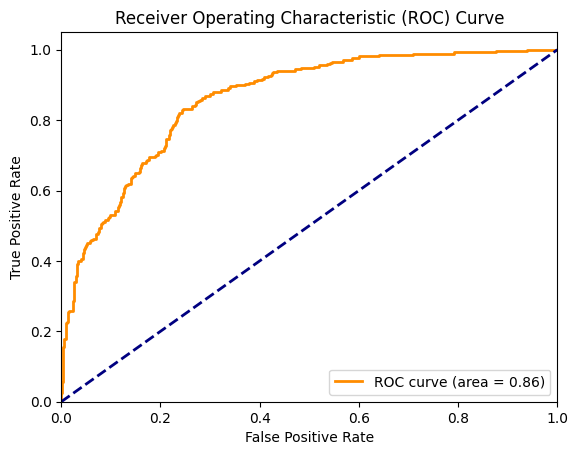

In [16]:
# Plotting the ROC curve and AUC
# AUC (Area Under the Curve) is a performance measurement for classification problems at various threshold settings
fpr, tpr, thresholds = roc_curve(y, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Summary of the neural network model and the architecure
# number of layers, parameters, and the activation functions used
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 665 (2.60 KB)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444 (1.74 KB)

the above can be useful with variational encoders in case that the neuron count per layer from high-to-low to highor there is a mismatch in shape

In [19]:
# Convert the data (numpy arrays) to Pytorch tensors
# avoding mismatched data formats later and errors
import torch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

/tmp/ipykernel_4520/4243489938.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
/tmp/ipykernel_4520/4243489938.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


In [22]:
# Create again a sequential model in Pytorch with the layers listed.
# first layer needs to match the input data, i.e. match the sizes of the previous code in Keras
import torch.nn as nn
model = nn.Sequential(
    nn.Linear(8, 12),  # input layer with 8 features and 12 neurons
    nn.ReLU(),         # activation function for the first layer
    nn.Linear(12, 8),  # second layer with 12 neurons and 8 neurons
    nn.ReLU(),         # activation function for the second layer
    nn.Linear(8, 1),   # output layer with 1 neuron
    nn.Sigmoid()       # activation function for the output layer
)
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


In [23]:
# The difference in the code below lies in the way the training is defined.
# Pytorch offers more explicit control over the training loop, requiring to manually iterate over epochs and batches.
# Keras is a high-level API that abstracts away many of these details, making the code more concise.
# THe training loop is handled internally by the fit model.
loss_fn = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

n_epochs = 100
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()  # Zero the gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Update the weights
    print(f"Finished epoch {epoch}, latest loss {loss}")

Finished epoch 0, latest loss 0.603904128074646
Finished epoch 1, latest loss 0.5923048853874207
Finished epoch 2, latest loss 0.5731387734413147
Finished epoch 3, latest loss 0.5344749093055725
Finished epoch 4, latest loss 0.49544966220855713
Finished epoch 5, latest loss 0.493211954832077
Finished epoch 6, latest loss 0.48220357298851013
Finished epoch 7, latest loss 0.4638974070549011
Finished epoch 8, latest loss 0.46206867694854736
Finished epoch 9, latest loss 0.46179893612861633
Finished epoch 10, latest loss 0.4606391489505768
Finished epoch 11, latest loss 0.44751688838005066
Finished epoch 12, latest loss 0.44295740127563477
Finished epoch 13, latest loss 0.4689052999019623
Finished epoch 14, latest loss 0.438371479511261
Finished epoch 15, latest loss 0.42308127880096436
Finished epoch 16, latest loss 0.43146854639053345
Finished epoch 17, latest loss 0.4211147427558899
Finished epoch 18, latest loss 0.4216967821121216
Finished epoch 19, latest loss 0.41273483633995056
Fini